<b>Teste técnico de modelagem</b>

Nessa parte, será necessário implementar um algoritmo de acordo com o paradigma do problema. Cada problema tem um conjunto de métricas que são requeridas. A variável alvo sempre será a coluna de nome “target”, exceto para os problemas não-supervisionados.

O trecho a seguir se trata das bibliotecas que seram utilizadas para realizar o teste técnico de modelagem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

1. Construa um classificador e identifique quais variáveis exercem maior impacto sobre o “target” e informe o porquê interpretando os resultados obtidos. 
    1. métricas: precision, recall e F1-score;
    2. dados: classification_data.

In [2]:
treino = pd.read_csv("./classification_data/classification_train.csv") 
teste = pd.read_csv("./classification_data/classification_test.csv")
treino.head(5)

,x1,x2,target
0,1.934224,-0.111822,1
1,1.767383,-0.976402,1
2,0.937101,-0.085633,1
3,1.340732,0.166960,1
4,-0.199901,-0.155204,1


In [3]:
X_treino = treino.drop("target",axis=1)
Y_treino = treino['target']
X_teste = teste.drop("target",axis=1)
Y_teste = teste["target"]

Para avaliar a classificação, irei utilizar 4 classificadores distintos: K-NN, K-Means, Decision Tree e MLP.

<b>K-NN</b>

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_treino,Y_treino)
pred = knn.predict(X_teste)


In [5]:
from sklearn.metrics import precision_score, recall_score, f1_score
recall = recall_score(Y_teste,pred)
precision = precision_score(Y_teste,pred)
f1 = f1_score(Y_teste,pred)
print("Precision:",precision)
print("Recall:",recall)
print("F1-Score:",f1)

Precision: 0.8554216867469879
Recall: 0.8819875776397516
F1-Score: 0.8685015290519877


<b>K-Means</b>

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(X_treino,Y_treino)
pred = kmeans.predict(X_teste)

In [7]:
recall = recall_score(Y_teste,pred)
precision = precision_score(Y_teste,pred)
f1 = f1_score(Y_teste,pred)
print("Precision:",precision)
print("Recall:",recall)
print("F1-Score:",f1)

Precision: 0.7409638554216867
Recall: 0.7639751552795031
F1-Score: 0.7522935779816513


<b>Decision Tree</b>

In [8]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_treino,Y_treino)
pred = tree.predict(X_teste)

In [9]:
recall = recall_score(Y_teste,pred)
precision = precision_score(Y_teste,pred)
f1 = f1_score(Y_teste,pred)
print("Precision:",precision)
print("Recall:",recall)
print("F1-Score:",f1)

Precision: 0.8322981366459627
Recall: 0.8322981366459627
F1-Score: 0.8322981366459627


<b>MLP</b>

In [10]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(max_iter=300).fit(X_treino, Y_treino)
pred = MLP.predict(X_teste)

In [11]:
recall = recall_score(Y_teste,pred)
precision = precision_score(Y_teste,pred)
f1 = f1_score(Y_teste,pred)
print("Precision:",precision)
print("Recall:",recall)
print("F1-Score:",f1)

Precision: 0.8554216867469879
Recall: 0.8819875776397516
F1-Score: 0.8685015290519877


Segundo o seguinte trecho de código da Decision Tree:

In [12]:
tree.feature_importances_

array([0.43332822, 0.56667178])

O atributo "x_2" tem maior importância para a classificação dos dados do que o atributo "x_1". Além disso também é plausível interpretar essa informação através da descrição de estatísticas dos atributos dos conjuntos de dados, segue o exemplo:

In [13]:
X_treino.describe()

,x1,x2
count,670.000000,670.000000
mean,0.481824,0.262611
std,0.914772,0.615023
min,-1.939767,-1.313970
25%,-0.169615,-0.159189
50%,0.492489,0.275538
75%,1.159680,0.717589
max,2.590410,1.904169


Pois o valor tem um desvio padrão menor, o que faz com que seja mais estável e assim, facilita a criação de divisores entre os dados a serem classificados.

2. Selecione um sku (produto) e realize uma previsão da demanda do mesmo nos próximos 4 intervalos de tempo de sua escolha (dia, semana, mês, etc).
    1. métricas: rmse, mape;
    2. dados: time_series_data.xlsx.

<b>As previsões serão realizadas todas com um intervalo de 1 semana entre si</b>

Para realizar a previsão, converti o arquivo xlsx para csv

In [14]:
produtos = pd.read_csv("time_series_data.csv")

In [15]:
produtos.head(5)

,produto_descricao,produto_quantidade,produto_unidade_comercial,produto_valor_unitario_comercializacao,nota_data_emissao
0,A0,23568,UN,"14,13",20210420
1,A0,25082,UN,"14,13",20210420
2,A0,25430,UN,"14,13",20210922
3,A0,25463,UN,"12,84",20210209
4,A0,25800,UN,"12,84",20210209


In [16]:
produtos.shape

(4460, 5)

Para escolher algum dos itens, irei observar quantos itens únicos existem na base de dados:

In [17]:
len(np.unique(produtos['produto_descricao']))

32

In [46]:
import random
produto_id = random.randint(0,32)
produto_id

9

In [47]:
escolha = np.unique(produtos['produto_descricao'])[produto_id]
escolha

'A9'

In [48]:
produto_escolhido = produtos[produtos['produto_descricao']==escolha]

In [49]:
produto_escolhido

,produto_descricao,produto_quantidade,produto_unidade_comercial,produto_valor_unitario_comercializacao,nota_data_emissao
48,A9,1,UN,"145,58",20210923
49,A9,2,UN,"145,58",20210908
50,A9,5,UN,"145,58",20210707
51,A9,20,UN,"132,25",20210228
221,A9,2,UN,"136,14",20210919
...,...,...,...,...,...
4386,A9,10,UN,"123,67",20201210
4393,A9,5,UN,"134,11",20201001
4399,A9,5,UN,"132,25",20201208
4400,A9,10,UN,"132,25",20210125


<b>Para a predição vamos testar 2 possibilidades: 1- Regressão Linear; 2-LSTM.</b>

<b>1. Regressão Linear</b>

Agora com os dados já processados, vamos retirar os dados relevantes para a tarefa (data, valor do produto) e o target (quantidade)

In [50]:
produto_escolhido = produto_escolhido.sort_values(by=['nota_data_emissao'])
dados = produto_escolhido['produto_valor_unitario_comercializacao'].apply(lambda x: float(str(x).replace(",",".")))
target = produto_escolhido["produto_quantidade"]
#dados = np.array(dados).reshape(-1,1)

In [51]:
from sklearn import preprocessing

x = np.array(dados).reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dados = pd.DataFrame(x_scaled)

In [52]:
dados.head(5)

,0
0,0.857441
1,0.021236
2,0.021236
3,0.021236
4,0.021236


In [53]:
X_treino = dados[0:len(dados)-4]
Y_treino = target[0:len(dados)-4]
X_teste = dados[len(dados)-4:]
Y_teste = target[len(dados)-4:]

In [54]:
X_treino = np.array(X_treino).reshape(-1,1)
X_teste = np.array(X_teste).reshape(-1,1)

In [55]:
from sklearn.linear_model import LinearRegression
regressao = LinearRegression().fit(X_treino,Y_treino)
pred = regressao.predict(X_teste)

In [56]:
regressao.coef_

array([13.434415])

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
print("RMSE:",mean_squared_error(Y_teste, pred))
print("MAPE:",mean_absolute_percentage_error(Y_teste, pred))

RMSE: 393.74852906369597
MAPE: 8.313017813205224


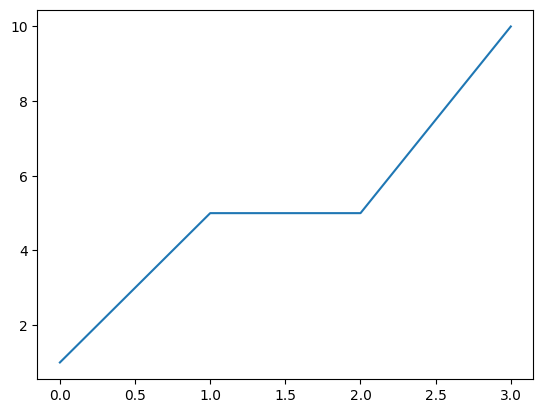

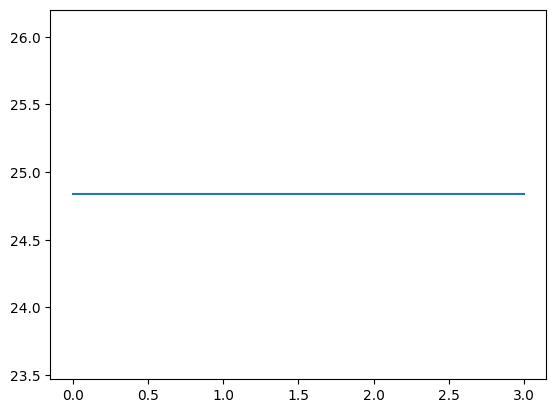

In [58]:
x = [i for i in range(len(X_teste))]
plt.plot(x,Y_teste)
plt.show()
plt.plot(x,pred)
plt.show()

<b>2.LSTM</b>

In [59]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		end_ix = i + n_steps
		if end_ix > len(sequence)-1:
			break
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

raw_seq = np.array(target)
n_steps = 3
X, y = split_sequence(raw_seq, n_steps)
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X_train = X[:len(y)-4]
y_train = y[:len(y)-4]
X_test = X[len(y)-4:]
y_test = y[len(y)-4:]
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=200, verbose=0)
predicao = []
true_y = []
for i in range(0,len(X_test)):
	x_input = X_test[i]
	x_input = np.array(x_input)
	true_y.append(y_test[i])
	x_input = x_input.reshape((1, n_steps, n_features))
	yhat = model.predict(x_input, verbose=0)
	predicao.append(yhat[0][0])

In [60]:
print(predicao)

[41.820484, 36.408783, 34.95389, 20.125048]


In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
print("RMSE:",mean_squared_error(true_y, predicao))
print("MAPE:",mean_absolute_percentage_error(true_y, predicao))

RMSE: 913.143948987673
MAPE: 13.526380968093873


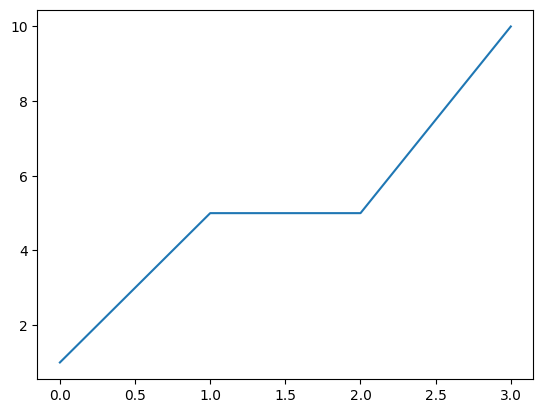

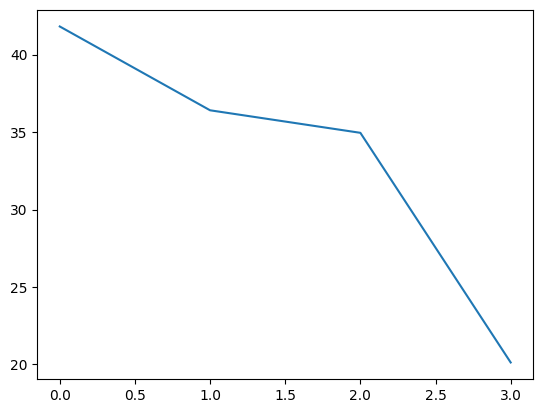

In [62]:
x = [i for i in range(len(true_y))]
plt.plot(x,true_y)
plt.show()
plt.plot(x,predicao)
plt.show()

3. Construa um regressor e identifique quais variáveis exercem maior impacto sobre o “target” e informe o porquê interpretando os resultados obtidos.
    1. métricas: RMSE, R2 e cor(target_observado, target_predito);
    2. dados: regression_data.zip.

In [63]:
treino = pd.read_csv("./regression_data/regression_train.csv")
teste = pd.read_csv("./regression_data/regression_test.csv")

In [64]:
colunas_numericas = treino.select_dtypes(["number"]).columns
for col in colunas_numericas:
    treino[col].fillna(value=treino[col].mean(), inplace=True)

colunas_numericas = teste.select_dtypes(["number"]).columns
for col in colunas_numericas:
    teste[col].fillna(value=teste[col].mean(), inplace=True)

In [65]:
X_treino = treino.drop("target",axis=1)
Y_treino = treino['target']
X_teste = teste.drop('target',axis=1)
Y_teste = teste['target']

In [66]:
X_treino.head(5)

,X1,X2,X3,X4,X5,X6,X7
0,-0.546168,-0.460781,47.063305,1.611370,-65.882137,0,-16.672865
1,3.074317,-2.836000,49.396649,0.261998,-66.570716,0,-6.664599
2,-1.485531,-13.102537,42.367991,3.991558,-67.108014,8,-30.790962
3,6.907396,-0.308967,57.228787,0.256771,-66.181266,5,-0.726072
4,1.916788,3.460290,51.703375,2.463790,-65.143663,5,8.131680


Iremos utilizar 2 regressores: 1) Regressor Linear e SVM (Support Vector Machine). Apresentando assim os resultados de ambos.

1. <b>Regressor Linear</b>

In [67]:
from sklearn.linear_model import LinearRegression
regressao = LinearRegression().fit(X_treino,Y_treino)
pred = regressao.predict(X_teste)

In [68]:
from sklearn.metrics import mean_squared_error, r2_score
print("RMSE:",mean_squared_error(Y_teste, pred))
print("R2:",r2_score(Y_teste, pred))

RMSE: 827255.6670894625
R2: 0.2483156335378618


Para olharmos quais são os atributos mais impactantes no target, basta olharmos os coeficientes da regressão:

In [69]:
regressao.coef_

array([ 37.26579481, 155.25081659,   0.15600164,  -8.97959863,
        -4.38505609,  10.70731996,   0.42810471])

Cada coeficiente desses é associado respectivamente a um atributo, sendo assim segue os atributos listados do mais impactante ao menos impactante, acompanhando do coeficiente do atributo

1. X2: 155.25;
2. X1: 37.26;
3. X6: 10.70;
4. X7: 0.42;
5. X3: 0.15;
6. X5: -4,38;
7. X4: -8.97;

Segue 3 gráficos, 2 com plots individuais entre o target previsto e o real valor do mesmo. Em seguida um plot com ambos presentes no mesmo plano.

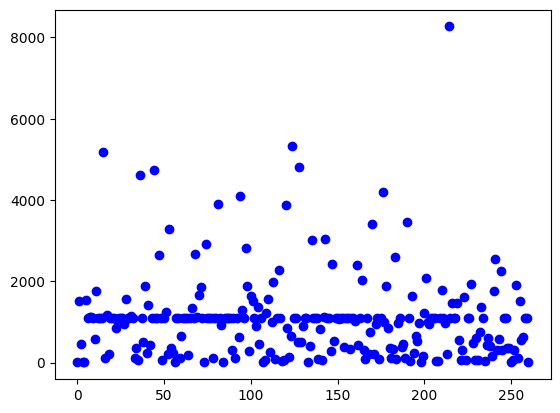

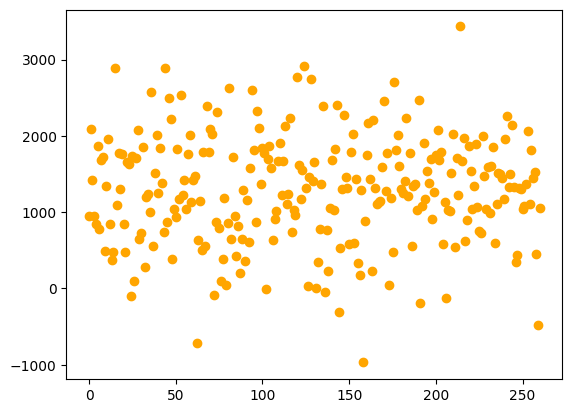

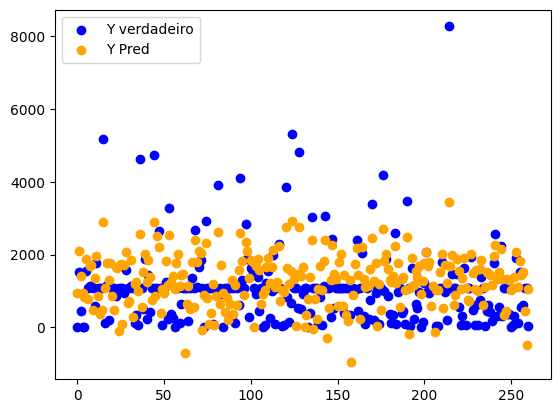

In [70]:
x = [i for i in range(len(teste))]
plt.scatter(x,Y_teste, c="blue")
plt.show()
plt.scatter(x,pred, c="orange")
plt.show()
plt.scatter(x, Y_teste, c="blue")
plt.scatter(x, pred, c="orange")
plt.legend(["Y verdadeiro","Y Pred"])
plt.show()

2. <b> SVM (Support Vector Machine) </b>

In [88]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

regr = Pipeline(steps=[('sca',StandardScaler()), ('clf',SVR(kernel='linear'))])
regr.fit(X_treino, Y_treino)
pred = regr.predict(X_teste)

In [89]:
from sklearn.metrics import mean_squared_error, r2_score
print("RMSE:",mean_squared_error(Y_teste, pred))
print("R2:",r2_score(Y_teste, pred))

RMSE: 1171470.0405652728
R2: -0.06445413468101835


Para olharmos quais são os atributos mais impactantes no target, basta olharmos os coeficientes da regressão:

In [90]:
regr.named_steps['clf'].coef_

array([[ 0.07913   ,  0.18039199, -0.00029117,  0.0192094 , -0.07542696,
         0.04101101, -0.00672136]])

Cada coeficiente desses é associado respectivamente a um atributo, sendo assim segue os atributos listados do mais impactante ao menos impactante, acompanhando do coeficiente do atributo

1. X2:  0.18;
2. X1:  0.07;
3. X6:  0.04;
4. X4:  0.01;
5. X3:  0.00;
6. X7:  0.00;
7. X5: -0.07;

Segue 3 gráficos, 2 com plots individuais entre o target previsto e o real valor do mesmo. Em seguida um plot com ambos presentes no mesmo plano.

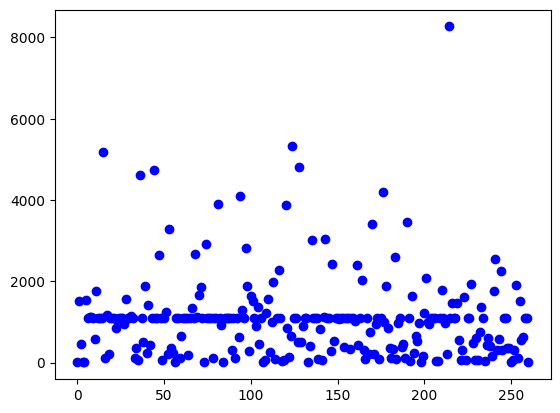

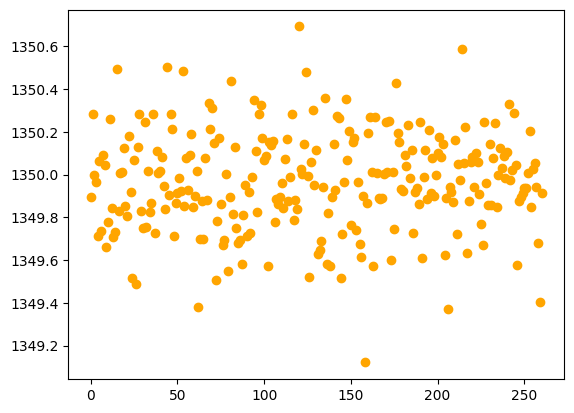

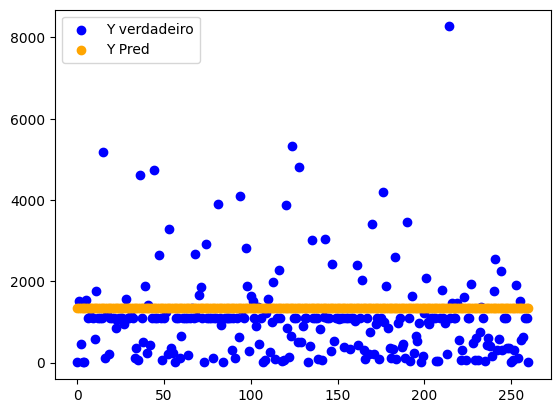

In [91]:
x = [i for i in range(len(teste))]
plt.scatter(x,Y_teste, c="blue")
plt.show()
plt.scatter(x,pred, c="orange")
plt.show()
plt.scatter(x, Y_teste, c="blue")
plt.scatter(x, pred, c="orange")
plt.legend(["Y verdadeiro","Y Pred"])
plt.show()